In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import coins
from sklearn.cluster import AgglomerativeClustering

from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

In [2]:
original_coins = coins()

In [3]:
original_coins.shape

(303, 384)

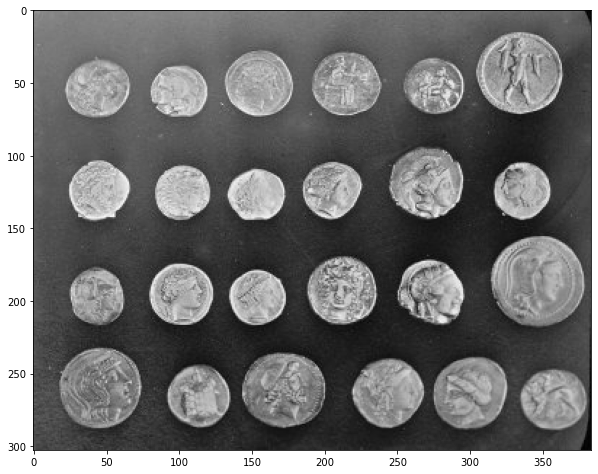

In [4]:
plt.figure(figsize=(10, 20))
plt.imshow(original_coins, cmap='gray');

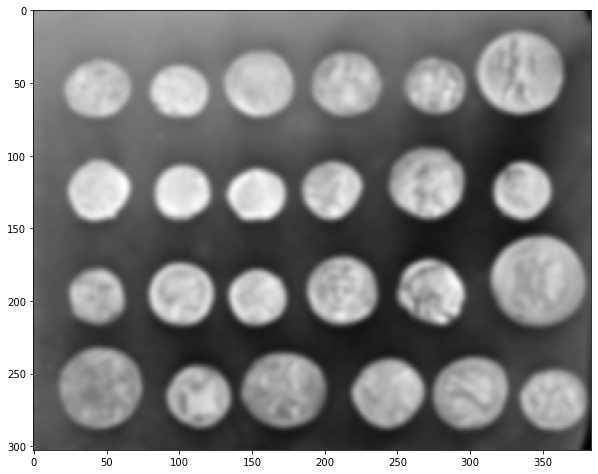

In [6]:
smoothened_coins = gaussian_filter(original_coins, sigma=2)
plt.figure(figsize=(10, 20))
plt.imshow(smoothened_coins, cmap='gray');

In [7]:
rescaled_coins = rescale(
    smoothened_coins,
    0.2,
    mode='reflect',
    multichannel=False,
    anti_aliasing=False
)
rescaled_coins.shape

(61, 77)

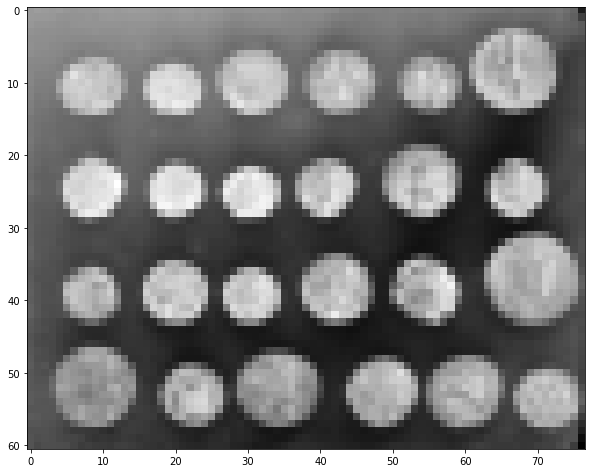

In [8]:
plt.figure(figsize=(10, 20))
plt.imshow(rescaled_coins, cmap='gray');

In [9]:
X = np.reshape(rescaled_coins, (-1, 1))
X.shape

(4697, 1)

In [10]:
from sklearn.feature_extraction import image

In [11]:
connectivity = image.grid_to_graph(*rescaled_coins.shape)
print(connectivity)

  (0, 1)	1
  (1, 2)	1
  (2, 3)	1
  (3, 4)	1
  (4, 5)	1
  (5, 6)	1
  (6, 7)	1
  (7, 8)	1
  (8, 9)	1
  (9, 10)	1
  (10, 11)	1
  (11, 12)	1
  (12, 13)	1
  (13, 14)	1
  (14, 15)	1
  (15, 16)	1
  (16, 17)	1
  (17, 18)	1
  (18, 19)	1
  (19, 20)	1
  (20, 21)	1
  (21, 22)	1
  (22, 23)	1
  (23, 24)	1
  (24, 25)	1
  :	:
  (4672, 4672)	1
  (4673, 4673)	1
  (4674, 4674)	1
  (4675, 4675)	1
  (4676, 4676)	1
  (4677, 4677)	1
  (4678, 4678)	1
  (4679, 4679)	1
  (4680, 4680)	1
  (4681, 4681)	1
  (4682, 4682)	1
  (4683, 4683)	1
  (4684, 4684)	1
  (4685, 4685)	1
  (4686, 4686)	1
  (4687, 4687)	1
  (4688, 4688)	1
  (4689, 4689)	1
  (4690, 4690)	1
  (4691, 4691)	1
  (4692, 4692)	1
  (4693, 4693)	1
  (4694, 4694)	1
  (4695, 4695)	1
  (4696, 4696)	1


In [12]:
connectivity.shape

(4697, 4697)

In [13]:
n_clusters = 25

agglo = AgglomerativeClustering(
    n_clusters=n_clusters,
    connectivity=connectivity,
)
agglo.fit(X)

AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=25)

In [14]:
label = np.reshape(agglo.labels_, rescaled_coins.shape)
label

array([[0, 0, 0, ..., 0, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

In [15]:
label.shape

(61, 77)

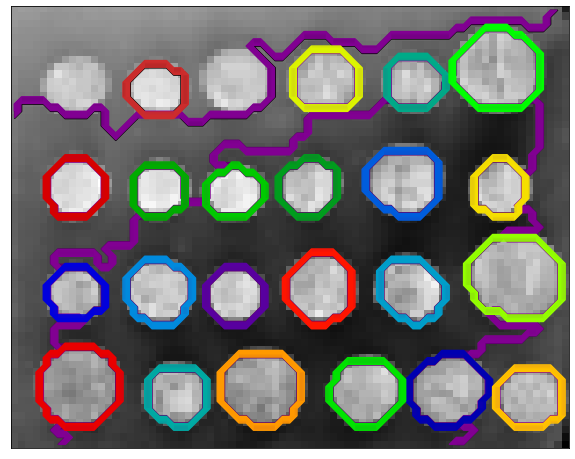

In [16]:
plt.figure(figsize=(10, 20))
plt.imshow(rescaled_coins, cmap='gray');

for l in range(n_clusters):
    plt.contour(label == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])

plt.xticks([])
plt.yticks([])
plt.show();